<font size="+3"><strong>BUSINESS ANALYTICS</strong></font>

##  Task 1: Exploratory Data Analysis (EDA) in Business Analytics

In [13]:
# Importing python libraries for the task
# import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

### Task 1.1. Data Acquisition and Understanding

In [14]:
# Read file into memory
sales_data = pd.read_csv("vgsales.csv")

In [15]:
# sales_data.head()
# sales_data.info()
# sales_data.describe()
# sales_data.size

### Task 1.2. Data Cleaning and Preparation

In [16]:
# Handling missing values
# sales_data.info()
# (sales_data.isnull().sum() / len(sales_data)) * 100
sales_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [17]:
# Drop columns with over 50% NaN
sales_data.drop(columns="Year", inplace=True)

# Drop missing values
sales_data.dropna(inplace=True)


In [18]:
# check for duplicates
sales_data.duplicated().sum()

# duplicates = sales_data.duplicated()

# # Count the number of duplicate rows
# num_duplicates = duplicates.sum()
# num_duplicates


0

In [19]:
# Remove outliers
# low, high = sales_data["NA_Sales"].quantile([0.1, 0.9])
# mask_area = sales_data["NA_Sales"].between(low, high)
# sales_data = sales_data[mask_area]


In [20]:
# Function for removing outliers
def outliers(variable):
    low, high = variable.quantile([0.1, 0.9])
    mask_area = variable.between(low, high)
    data = sales_data[mask_area]
    
    return data

In [21]:
# Create a for loop to remove outliers
print("Before outliers: ", sales_data.size)
sales_list = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
for x in sales_list:
    sales_data = outliers(sales_data[x])

print("After outliers: ", sales_data.size)
sales_data.head()


Before outliers:  165400
After outliers:  93030


,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5955,5957,Just Dance Kids 2,Wii,Misc,Ubisoft,0.28,0.00,0.00,0.02,0.29
5956,5958,RealSports Boxing,2600,Sports,Atari,0.28,0.02,0.00,0.00,0.29
5957,5959,Imagine: Makeup Artist,DS,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
5959,5961,Syphon Filter: Dark Mirror,PSP,Shooter,Sony Computer Entertainment,0.26,0.01,0.00,0.03,0.29
5960,5962,Front Mission Evolved,PS3,Shooter,Square Enix,0.09,0.07,0.11,0.03,0.29


In [22]:
# df_na = outliers(sales_data["NA_Sales"])
# df_eu = outliers(sales_data["EU_Sales"])
# df_jp = outliers(sales_data["JP_Sales"])
# df_o = outliers(sales_data["Other_Sales"])
# df_g = outliers(sales_data["Global_Sales"])

# print(df_g.size)
# print(df_jp.size)
# df_g.head()
# # outliers(sales_data["NA_Sales"]).head()

In [23]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9303 entries, 5955 to 15979
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          9303 non-null   int64  
 1   Name          9303 non-null   object 
 2   Platform      9303 non-null   object 
 3   Genre         9303 non-null   object 
 4   Publisher     9303 non-null   object 
 5   NA_Sales      9303 non-null   float64
 6   EU_Sales      9303 non-null   float64
 7   JP_Sales      9303 non-null   float64
 8   Other_Sales   9303 non-null   float64
 9   Global_Sales  9303 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 799.5+ KB


### Task 1.3. Descriptive Analysis

In [24]:
# Performing Summary Statistics
# sales_data["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales""Global_Sales"].mean()
# sales_data["Other_Sales"].mean()
# sales_data["Global_Sales"].mean()

# mean stats
NA = round(sales_data["NA_Sales"].mean(), 4)
EU = round(sales_data["EU_Sales"].mean(), 4)
JP = round(sales_data["JP_Sales"].mean(), 3)

# median stats
NA_MED = sales_data["NA_Sales"].median()
EU_MED = sales_data["EU_Sales"].median()
JP_MED = sales_data["JP_Sales"].median()

# mode stats
# NA_MoD = sales_data["NA_Sales"].mod()
# EU_MoD = sales_data["EU_Sales"].mod()
# JP_MoD = sales_data["JP_Sales"].mod()

# std stats
NA_std = round(sales_data["NA_Sales"].std(), 4)
EU_std = round(sales_data["EU_Sales"].std(), 4)
JP_std = round(sales_data["JP_Sales"].std(), 4)


print(f"Mean values for key columns: NA_Sales: {NA}, EU_Sales: {EU}, JP_Sales: {JP}")

print(f"Median values for key columns: NA_Sales: {NA_MED}, EU_Sales: {EU_MED}, JP_Sales: {JP_MED}")

print(f"Standard Deviation values for key columns: NA_Sales: {NA_std}, EU_Sales: {EU_std}, JP_Sales: {JP_std}")

Mean values for key columns: NA_Sales: 0.0566, EU_Sales: 0.0216, JP_Sales: 0.017
Median values for key columns: NA_Sales: 0.04, EU_Sales: 0.01, JP_Sales: 0.0
Standard Deviation values for key columns: NA_Sales: 0.0608, EU_Sales: 0.0295, JP_Sales: 0.0332


### Task 1.4. Data Visualization

In [45]:
# sales_data.info()

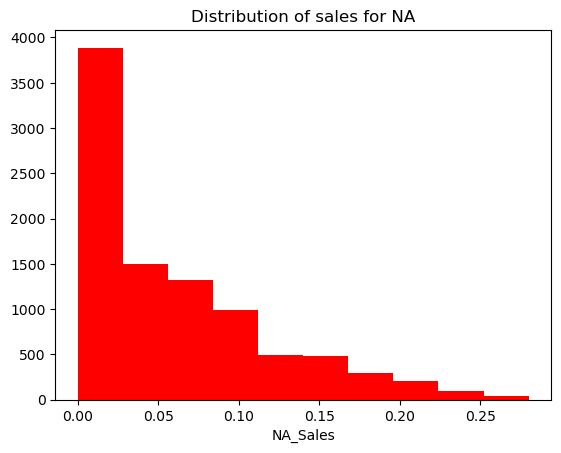

In [25]:
# Histogram for NA Sales
plt.hist(sales_data["NA_Sales"],  color='red')
plt.xlabel("NA_Sales")
plt.title("Distribution of sales for NA");

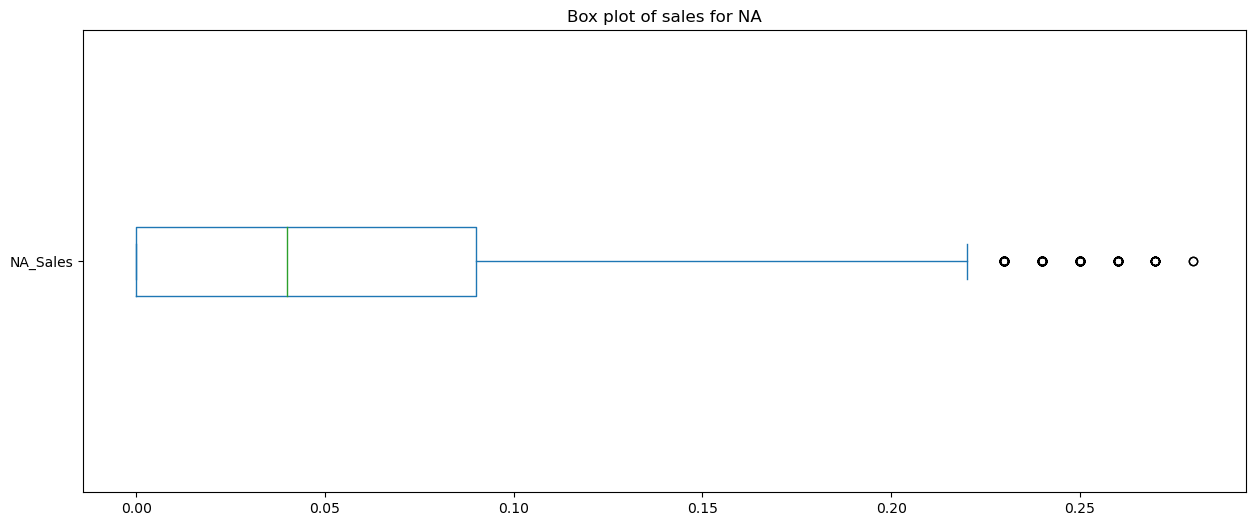

In [26]:
# Box plot
fig, ax = plt.subplots(figsize=(15, 6))
sales_data["NA_Sales"].plot(kind="box", vert=False, title="Box plot of sales for NA", ax=ax);

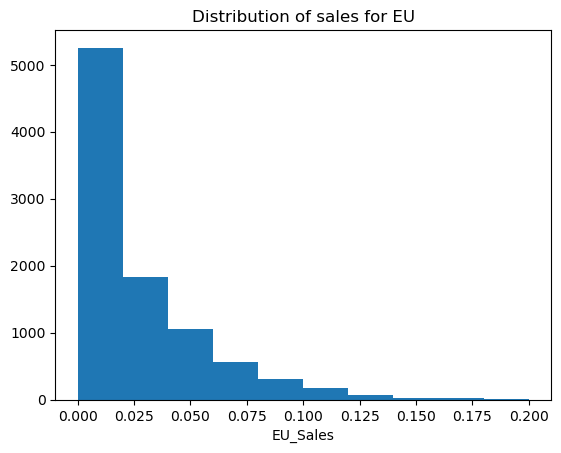

In [27]:
# Histogram for EU Sales
plt.hist(sales_data["EU_Sales"])
plt.xlabel("EU_Sales")
plt.title("Distribution of sales for EU");

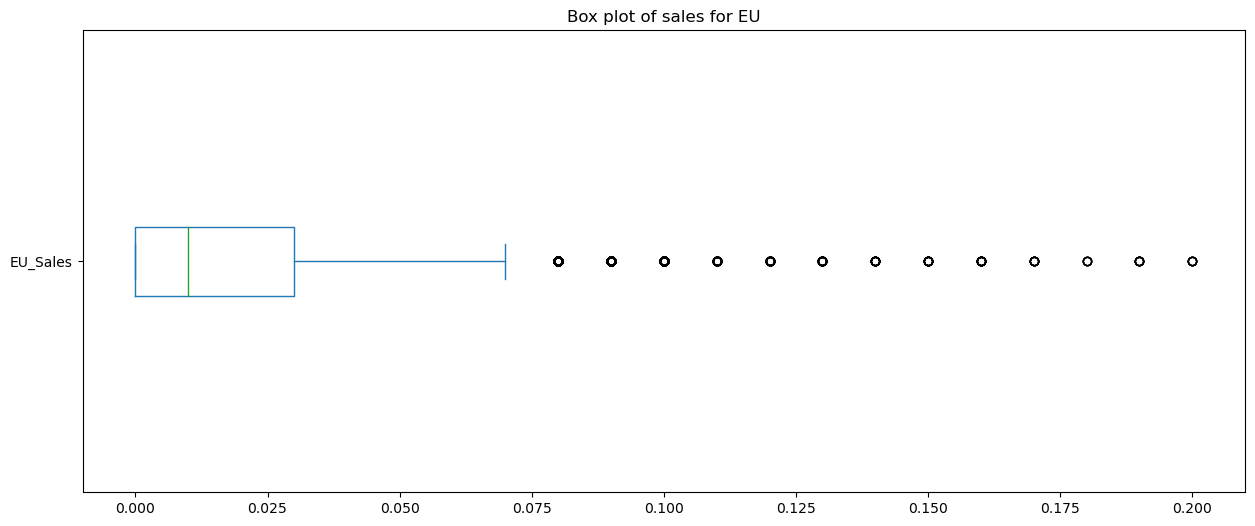

In [28]:
# Box plot for EU Sales
fig, ax = plt.subplots(figsize=(15, 6))
sales_data["EU_Sales"].plot(kind="box", vert=False, title="Box plot of sales for EU", ax=ax);

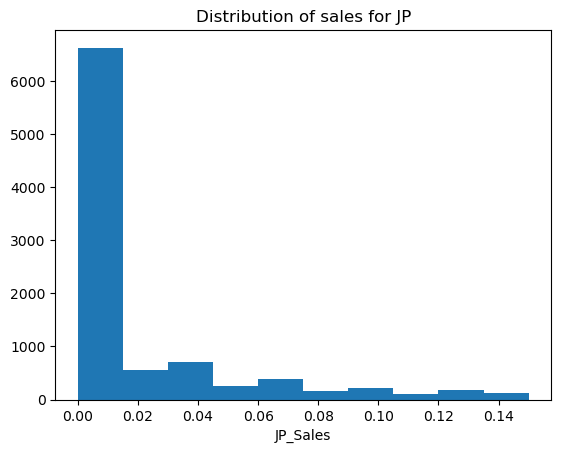

In [29]:
# Histogram for JP Sales
plt.hist(sales_data["JP_Sales"])
plt.xlabel("JP_Sales")
plt.title("Distribution of sales for JP");

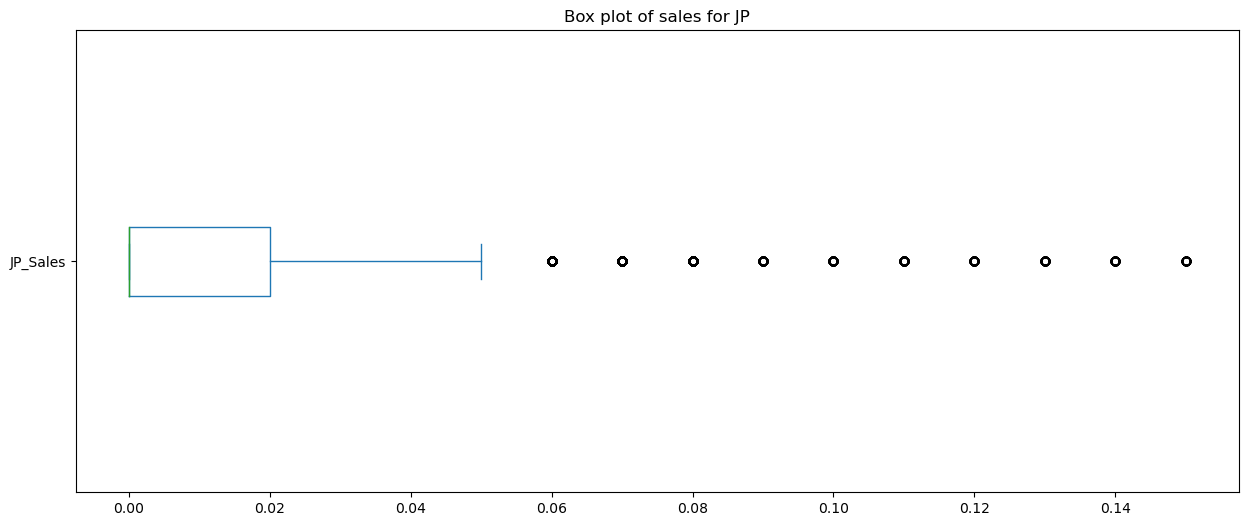

In [30]:
# Box plot for JP Sales
fig, ax = plt.subplots(figsize=(15, 6))
sales_data["JP_Sales"].plot(kind="box", vert=False, title="Box plot of sales for JP", ax=ax);

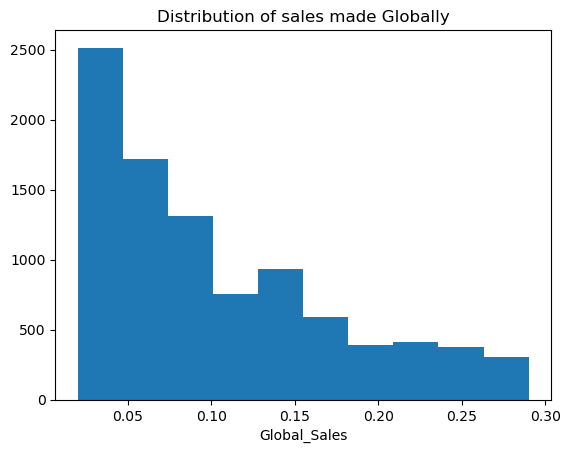

In [31]:
# Histogram for Global Sales
plt.hist(sales_data["Global_Sales"])
plt.xlabel("Global_Sales")
plt.title("Distribution of sales made Globally");

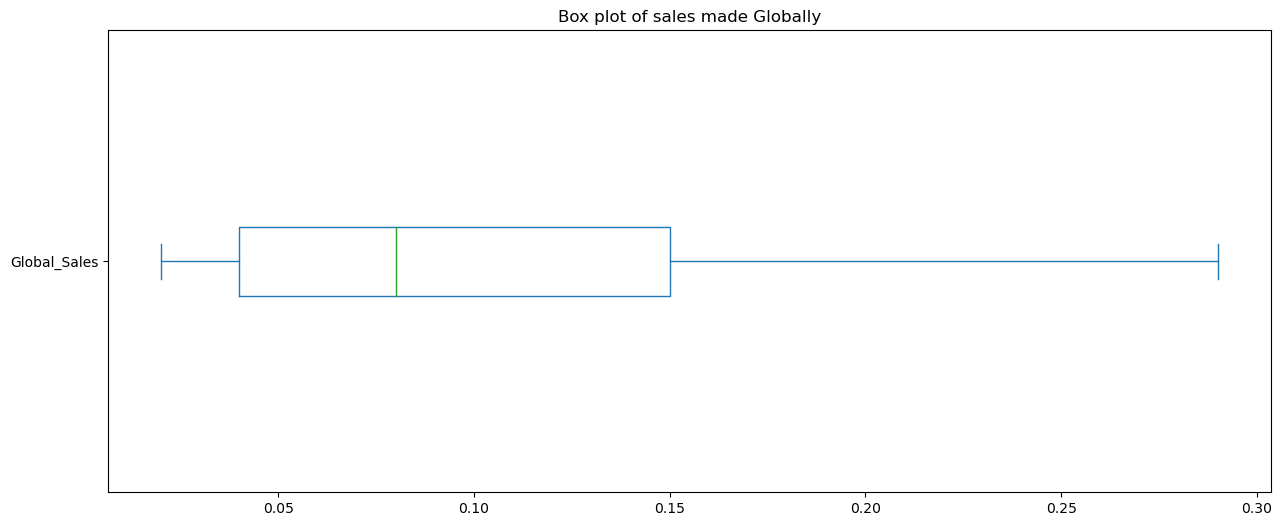

In [32]:
# Box plot for Global Sales
fig, ax = plt.subplots(figsize=(15, 6))
sales_data["Global_Sales"].plot(kind="box", vert=False, title="Box plot of sales made Globally", ax=ax);

### Task 1.4.1 Relationships Between Data

In [33]:
sales_data.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5955,5957,Just Dance Kids 2,Wii,Misc,Ubisoft,0.28,0.00,0.00,0.02,0.29
5956,5958,RealSports Boxing,2600,Sports,Atari,0.28,0.02,0.00,0.00,0.29
5957,5959,Imagine: Makeup Artist,DS,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
5959,5961,Syphon Filter: Dark Mirror,PSP,Shooter,Sony Computer Entertainment,0.26,0.01,0.00,0.03,0.29
5960,5962,Front Mission Evolved,PS3,Shooter,Square Enix,0.09,0.07,0.11,0.03,0.29


In [34]:
# A dictionary to hold all sales data
NA_EU = {"NA": sales_data["NA_Sales"],
         "EU": sales_data["EU_Sales"]}
JP_O ={"JP": sales_data["JP_Sales"],
        "O": sales_data["Other_Sales"]}
O_G = {"OT": sales_data["Other_Sales"],
         "G": sales_data["Global_Sales"]}

corr_data = {
    "NA": sales_data["NA_Sales"],
    "EU": sales_data["EU_Sales"],
    "JP": sales_data["JP_Sales"],
    "O": sales_data["Other_Sales"],
    "G": sales_data["Global_Sales"]
}
corr_data
# sales_data["NA_Sales"].head()

{'NA': 5955     0.28
 5956     0.28
 5957     0.27
 5959     0.26
 5960     0.09
          ... 
 15975    0.01
 15976    0.00
 15977    0.01
 15978    0.00
 15979    0.01
 Name: NA_Sales, Length: 9303, dtype: float64,
 'EU': 5955     0.00
 5956     0.02
 5957     0.00
 5959     0.01
 5960     0.07
          ... 
 15975    0.00
 15976    0.00
 15977    0.00
 15978    0.00
 15979    0.00
 Name: EU_Sales, Length: 9303, dtype: float64,
 'JP': 5955     0.00
 5956     0.00
 5957     0.00
 5959     0.00
 5960     0.11
          ... 
 15975    0.00
 15976    0.02
 15977    0.00
 15978    0.02
 15979    0.00
 Name: JP_Sales, Length: 9303, dtype: float64,
 'O': 5955     0.02
 5956     0.00
 5957     0.02
 5959     0.03
 5960     0.03
          ... 
 15975    0.00
 15976    0.00
 15977    0.00
 15978    0.00
 15979    0.00
 Name: Other_Sales, Length: 9303, dtype: float64,
 'G': 5955     0.29
 5956     0.29
 5957     0.29
 5959     0.29
 5960     0.29
          ... 
 15975    0.02
 15976    0.02
 

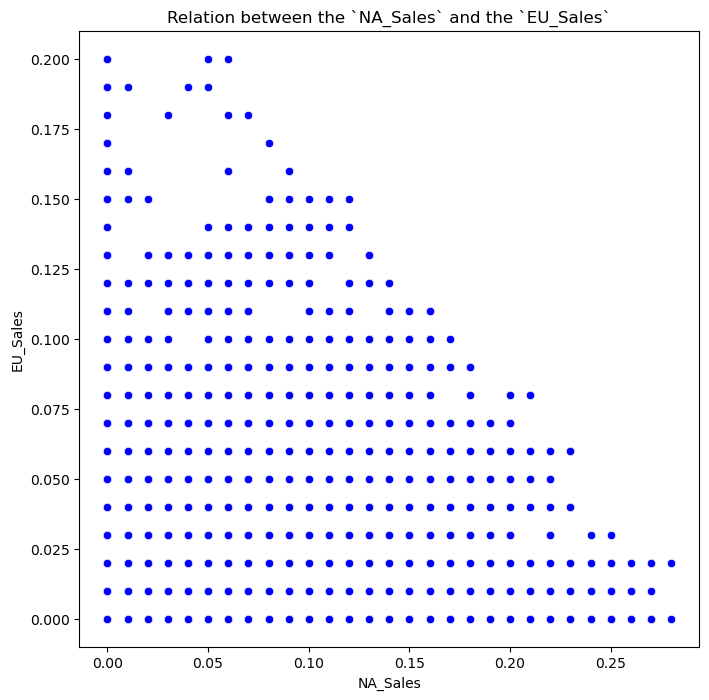

In [35]:
# Relationship between the NA_Sales and the EU_Sales
plt.figure(figsize=(8, 8))
sns.scatterplot(x='NA', y='EU', data=NA_EU, color='blue', marker='o')

# Adding labels
plt.xlabel("NA_Sales"),
plt.ylabel("EU_Sales"),
plt.title('Relation between the `NA_Sales` and the `EU_Sales`')

# Display the pie chart
plt.show()

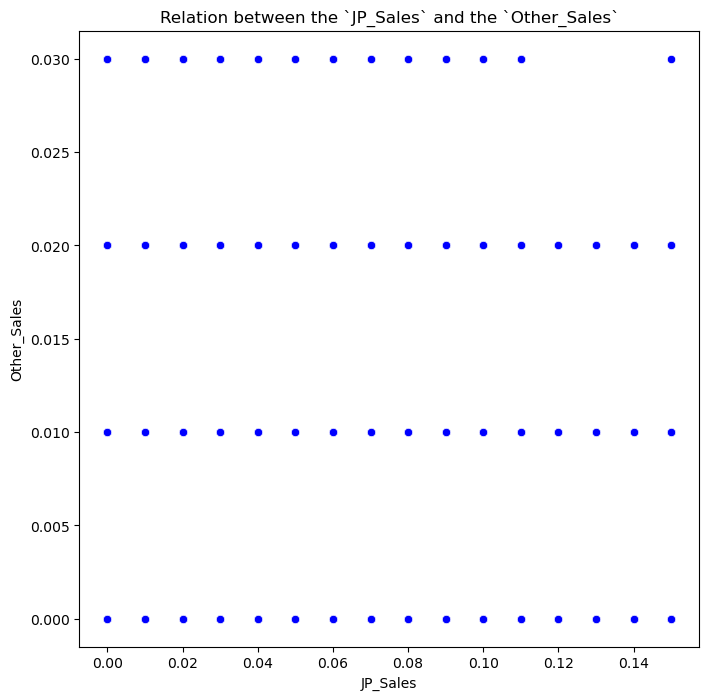

In [36]:
# Relationship between the JP_Sales and the Other_Sales
plt.figure(figsize=(8, 8))
sns.scatterplot(x='JP', y='O', data=JP_O, color='blue', marker='o')

# Adding labels
plt.xlabel("JP_Sales"),
plt.ylabel("Other_Sales"),
plt.title('Relation between the `JP_Sales` and the `Other_Sales`')

# Display the pie chart
plt.show()

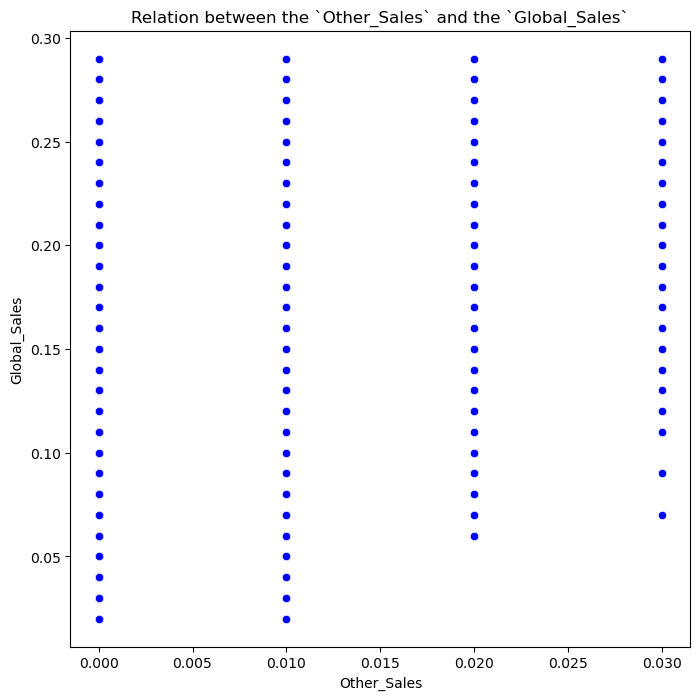

In [37]:
# Relationship between the NA_Sales and the EU_Sales
plt.figure(figsize=(8, 8))
sns.scatterplot(x="OT", y='G', data=O_G, color='blue', marker='o')

# Adding labels
plt.xlabel("Other_Sales"),
plt.ylabel("Global_Sales"),
plt.title('Relation between the `Other_Sales` and the `Global_Sales`')

# Display the pie chart
plt.show()

### Task 1.5. Segmentation and Profilling

In [38]:
# Segment data based on the `Genre` of the product
grp_data = sales_data.groupby('Genre')
print("Segmented Data Based on `Genre`")

# print(grp_data.agg({'NA_Sales': ['count', 'mean', 'median', 'min', 'max'],}))
# print(grp_data.agg({'EU_Sales': ['count', 'mean', 'median', 'min', 'max']}))
# print(grp_data.agg({'JP_Sales': ['count', 'mean', 'median', 'min', 'max']}))
# print(grp_data.agg({'Other_Sales': ['count', 'mean', 'median', 'min', 'max']}))
grp_data.agg({'Global_Sales': ['count', 'mean', 'median', 'min', 'max']})

Segmented Data Based on `Genre`


Global_Sales                             
                    count      mean median   min   max
Genre                                                 
Action               1800  0.108228   0.09  0.02  0.29
Adventure             921  0.074864   0.05  0.02  0.29
Fighting              426  0.105751   0.09  0.02  0.29
Misc                 1035  0.105614   0.09  0.02  0.29
Platform              423  0.109362   0.09  0.02  0.29
Puzzle                383  0.089347   0.07  0.02  0.29
Racing                705  0.111475   0.10  0.02  0.29
Role-Playing          811  0.101060   0.08  0.02  0.29
Shooter               662  0.103671   0.09  0.02  0.29
Simulation            507  0.097673   0.07  0.02  0.29
Sports               1195  0.117280   0.11  0.02  0.29
Strategy              435  0.078989   0.06  0.02  0.29

In [39]:
# Segment data based on the `Platform` of the product
grp_data = sales_data.groupby('Platform')
print("Segmented Data Based on `Platform`")

# print(grp_data.agg({'NA_Sales': ['count', 'mean', 'median']}))
# print(grp_data.agg({'EU_Sales': ['count', 'mean', 'median']}))
# print(grp_data.agg({'JP_Sales': ['count', 'mean', 'median']}))
# print(grp_data.agg({'Other_Sales': ['count', 'mean', 'median']}))
grp_data.agg({'Global_Sales': ['count', 'mean', 'median', 'min', 'max']})

Segmented Data Based on `Platform`


Global_Sales                             
                count      mean median   min   max
Platform                                          
2600               34  0.215000  0.220  0.07  0.29
3DO                 3  0.033333  0.020  0.02  0.06
3DS               316  0.094747  0.080  0.02  0.29
DC                 30  0.084667  0.080  0.02  0.15
DS               1496  0.095301  0.080  0.02  0.29
GB                 10  0.100000  0.095  0.06  0.14
GBA               498  0.108775  0.080  0.02  0.29
GC                379  0.114987  0.100  0.02  0.29
GEN                14  0.080000  0.070  0.03  0.15
GG                  1  0.040000  0.040  0.04  0.04
N64               155  0.146452  0.140  0.02  0.29
NES                 3  0.080000  0.070  0.06  0.11
NG                  8  0.070000  0.065  0.02  0.14
PC                655  0.060611  0.040  0.02  0.29
PCFX                1  0.030000  0.030  0.03  0.03
PS                589  0.118387  0.110  0.02  0.29
PS2              1028  0.107033  0.090  0.02  0.29
PS3               560  0.108393  0.100  0.02  0.29
PS4               153  0.080850  0.060  0.02  0.28
PSP               785  0.077376  0.060  0.02  0.29
PSV               277  0.068809  0.050  0.02  0.27
SAT               105  0.082857  0.080  0.02  0.15
SCD                 5  0.074000  0.060  0.05  0.14
SNES               64  0.074063  0.065  0.02  0.18
TG16                2  0.080000  0.080  0.02  0.14
WS                  1  0.030000  0.030  0.03  0.03
Wii               772  0.121036  0.110  0.02  0.29
WiiU               74  0.111757  0.090  0.02  0.29
X360              613  0.133051  0.120  0.02  0.29
XB                573  0.113735  0.100  0.02  0.29
XOne               99  0.112525  0.100  0.02  0.28

### Task 1.6. Correlations Between Data

In [40]:
# CORRELATION MATRIX
data = pd.DataFrame(corr_data)
corr_matrix = data.corr()

print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
          NA        EU        JP         O         G
NA  1.000000  0.258439 -0.374521  0.522367  0.831247
EU  0.258439  1.000000 -0.289879  0.625447  0.559009
JP -0.374521 -0.289879  1.000000 -0.237234 -0.005157
O   0.522367  0.625447 -0.237234  1.000000  0.684837
G   0.831247  0.559009 -0.005157  0.684837  1.000000


Text(0.5, 1.0, 'Correlation Matrix for the all Sales Data')

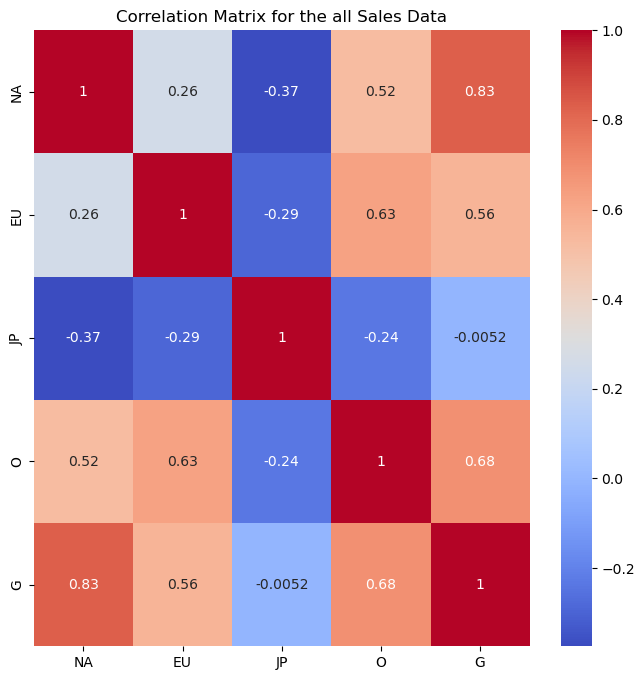

In [41]:
# HEATMAP OF THE CORRELATION
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for the all Sales Data")

---
**@ INTERNCAREER**